<a href="https://colab.research.google.com/github/livetabileisyte/git/blob/master/SC385_Spring_Data_Analysis_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis exercise 1

Student ID: 1905517

## SC385 Spring Term, 2021–2022

In this data analysis exercise, you will use Python and related libraries for data analysis and visualisation to study the anonymised and aggregated dataset [Covid-19 Google Community Mobility Reports](https://www.google.com/covid19/mobility/). We use the data as an example of large open data source. The data display human mobility trends over time by country and region, across different categories of places, including retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential. For each place in a region, the data display the percentage change in visits for the reported date compared to a baseline period in early 2020. Mobility changes are reported as a positive or negative percentages.

To perform your analysis, import the following Python libraries and modules: 
`pandas`, `numpy`, `seaborn`, `matplotlib.pyplot`, `stats` from `scipy`, and `date` from `datetime`.

To create a reproducible research report, use throughout the notebook:
* Python code in Code cells
* hashtag symbol `#` in Code cells to introduce a comment line describing your Python code
* Markdown language in Text cells to write up your methods, results, and interpretation.

Before submission, please `Restart and run all` (under `Runtime` in the Colab menu bar) to make sure that your data analysis is computationally reproducible.

You need to submit your notebook by 10am on 25 February 2022 on FASER. You can download your Colab notebook from `File` and then `Download .ipynb`, and submit on FASER your downloaded notebook. Your notebook would contain approximately ~1000 words, including computer code (excluding the description of the tasks in this template). 

Feel free to reuse code from your Colab notebook with weekly exercises as well as from the course Colab notebooks. You are also encouraged to consult and refer to online tutorials and sources, including [DataCamp](https://learn.datacamp.com/courses/introduction-to-data-science-in-python) courses and [Stack Overflow](https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot). You can refer to such sources by providing links pointing to them similar to the links to DataCamp and Stack Overflow in the previous sentence.        

### Task 1

Analyse how countries differ in their mobility trends. Use the `catplot` function to visualise mobility trends across the six mobility categories for a set of five countries of your choice. Provide a brief interpretation of the results focusing on differences between countries and on mobility categories that differentiate (or not) the countries you selected.   

_Level of analysis:_ country

_Variables:_ all six mobility categories

_Descriptive statistics:_ median (no need to compute this separately, you will get it from the boxplot)

_Plotting:_ boxplots via the `catplot` function in `seaborn`


In [1]:
import seaborn as myseaborn

In [2]:
myseaborn.catplot?

In [3]:
# Insert your code about Taks 1 here. Add both Code cells and Text cells as needed. 





In [4]:
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 10.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [5]:


import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme() 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from datetime import date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:

mobility_trends = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', parse_dates = ['date'])

mobility_trends.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'Retail_Recreation',
                               'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery_Pharmacy',
                               'parks_percent_change_from_baseline': 'Parks',
                               'transit_stations_percent_change_from_baseline': 'Transit_stations',
                               'workplaces_percent_change_from_baseline': 'Workplaces',
                               'residential_percent_change_from_baseline': 'Residential'},inplace=True)

mobility_trends

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835652,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-02-11,NaN,NaN,NaN,NaN,78.0,NaN
8835653,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-02-14,NaN,NaN,NaN,NaN,65.0,NaN
8835654,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-02-15,NaN,NaN,NaN,NaN,79.0,NaN
8835655,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-02-16,NaN,NaN,NaN,NaN,76.0,NaN


In [7]:


mobility_trends_countries = mobility_trends[mobility_trends['country_region'].isin
                                                (['Spain',
                                                  'Italy',
                                                  'Lithuania',
                                                  'Latvia',
                                                  'United Kingdom'])]
                                              

mobility_trends_countries.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
3066921,ES,Spain,NaN,NaN,NaN,NaN,NaN,ChIJi7xhMnjjQgwR7KNoB5Qs7KY,2020-02-15,2.0,-1.0,26.0,8.0,0.0,-2.0
3066922,ES,Spain,NaN,NaN,NaN,NaN,NaN,ChIJi7xhMnjjQgwR7KNoB5Qs7KY,2020-02-16,2.0,3.0,13.0,5.0,-1.0,-2.0
3066923,ES,Spain,NaN,NaN,NaN,NaN,NaN,ChIJi7xhMnjjQgwR7KNoB5Qs7KY,2020-02-17,0.0,1.0,9.0,3.0,3.0,-1.0
3066924,ES,Spain,NaN,NaN,NaN,NaN,NaN,ChIJi7xhMnjjQgwR7KNoB5Qs7KY,2020-02-18,-2.0,0.0,5.0,4.0,3.0,0.0
3066925,ES,Spain,NaN,NaN,NaN,NaN,NaN,ChIJi7xhMnjjQgwR7KNoB5Qs7KY,2020-02-19,0.0,1.0,11.0,2.0,3.0,-1.0


In [8]:
mobility_trends.country_region.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

In [9]:
mobility_trends_countries_long1 = pd.melt(mobility_trends_countries, 
                               id_vars = mobility_trends_countries.columns[[1,8]],
                               value_vars = mobility_trends_countries.columns[8:14]).dropna()

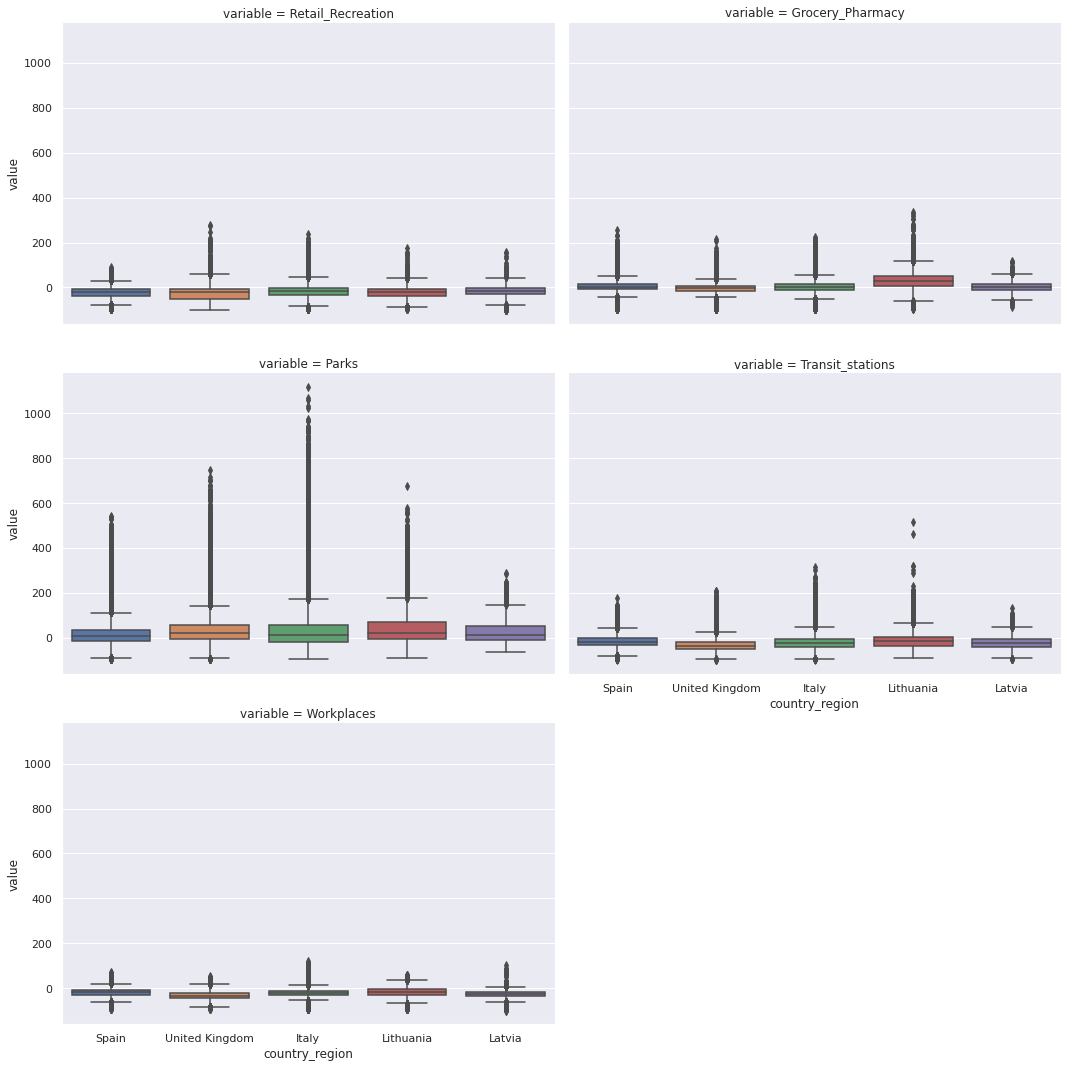

In [10]:
# Differences in multiple mobility trends across selected countries
g = sns.catplot(x="country_region", y="value", col="variable", col_wrap=2, kind="box", height=5, aspect=1.5,
                sharey=True,
                data=mobility_trends_countries_long1);

The results from tables in task 1 show that across all 5 countries for all 6 mobility trends that the median is very similar. Firstly, the table with the variable of retail and recreation shows that overall all countries have a similar median of less than 0, this means that on average most citizens of those countries did not go out to do retail/recretion as the values are less than 0. In addition, all of the boxplots are very small, this means that the data is not very spread out, therefore the data is more accurate. Next, the table on Grocery and Pharmacy shopping shows that most countries have a median of around 0, except from Lithuania having a slightly higher value than the rest and Spain having the lowest value, this means that most people did not go out as much to do grocery/pharmaceutical shop. Next, the table on parks shows that all countries had more people going out to parks as the value is more than 0, with United Kingdom having the highest value and Latvia having the lowest value. The box plots are bigger compared to other variables, meaning that the data could potentially not be as accurate as the rest. Furthermore, the variable on transit stations shows that most countries had a value of less than 0, meaning that not a lot of people in those countries used travel services, with an exception from Lithuania which had a higher value in the usage compared to the rest of the countries, with United Kingdom being the lowest, which could be potentialy due to people working from home. To add, variable on attendance on workplace shows an average median on 0 for all countries, therefore most people did not go to work. The boxplots are also very small, therefore the data could be more accurate.

### Task 2
Analyse the mobility changes in the United Kingdom during the second lockdown, 5 November - 2 December 2020. Perform the following analysis and visualisation: 
1. After selecting data about the UK, use the `catplot` function for ploting categorical variables in `seaborn` to plot workplaces mobility changes across all UK counties. In addition, plot the 99% confidence intervals (CI) using 10,000 bootstrap iterations. Briefly interpret the results and compare your results to the results about the first lockdown discussed in labs.
2. Compute the median mobility change across all UK counties and six mobility categories. Use the median values to fit a linear regression model between the variables `retail_recreation` and `workplaces`. Plot the relationship using the `regplot` function in `seaborn`. Briefly discuss your results.

_Level of analysis:_ UK county

_Variables:_ selected mobility categories and `workplaces` in particular

_Descriptive statistics:_ mean, median, and 99% CI

_Modelling:_ linear regression model

_Plotting:_ `catplot` and `regplot` in `seaborn`

In [11]:
# Insert your code about Taks 2 here. Add both Code cells and Text cells as needed. 







In [12]:
pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme() 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from datetime import date

In [14]:
mobility_trends = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', parse_dates = ['date'])

mobility_trends.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'Retail_Recreation',
                               'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery_Pharmacy',
                               'parks_percent_change_from_baseline': 'Parks',
                               'transit_stations_percent_change_from_baseline': 'Transit_stations',
                               'workplaces_percent_change_from_baseline': 'Workplaces',
                               'residential_percent_change_from_baseline': 'Residential'},inplace=True)

mobility_trends

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835652,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-02-11,NaN,NaN,NaN,NaN,78.0,NaN
8835653,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-02-14,NaN,NaN,NaN,NaN,65.0,NaN
8835654,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-02-15,NaN,NaN,NaN,NaN,79.0,NaN
8835655,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-02-16,NaN,NaN,NaN,NaN,76.0,NaN


In [15]:
MobilityTrends_Lockdown2 = mobility_trends[(mobility_trends['country_region'] == 'United Kingdom') & 
  (mobility_trends['date'] > '2020-11-05') & (mobility_trends['date'] <= '2020-12-02')]


MobilityTrends_Lockdown2.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
3255995,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-06,-55.0,-12.0,5.0,-52.0,-38.0,17.0
3255996,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-07,-60.0,-16.0,13.0,-58.0,-28.0,13.0
3255997,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-08,-60.0,-20.0,5.0,-57.0,-28.0,10.0
3255998,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-09,-47.0,-15.0,5.0,-50.0,-39.0,15.0
3255999,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,ChIJqZHHQhE7WgIReiWIMkOg-MQ,2020-11-10,-48.0,-13.0,14.0,-49.0,-39.0,15.0


In [ ]:
grid1=sns.catplot(x='Workplaces', y='sub_region_1',kind='bar',
            height=50,aspect=0.4,ci=95,n_boot = 10000,
            order = MobilityTrends_Lockdown2.groupby('sub_region_1')['Workplaces'].mean().sort_values().index,
            data=MobilityTrends_Lockdown2)
grid1.set_axis_labels('Workplaces mobility', 'Counties in the UK')

In [ ]:
MobilityTrends_Lockdown2.head()

In [ ]:
MobilityTrends_Lockdown2_median = MobilityTrends_Lockdown2.groupby('sub_region_1')[['Retail_Recreation',
                                               'Grocery_Pharmacy',
                                               'Parks',
                                               'Transit_stations',
                                               'Workplaces',
                                               'Residential']].median()


In [ ]:
MobilityTrends_Lockdown2_median.shape

In [ ]:
MobilityTrends_Lockdown2_median_no_na = MobilityTrends_Lockdown2_median[['Retail_Recreation','Workplaces']].dropna()
MobilityTrends_Lockdown2_median_no_na.shape

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(MobilityTrends_Lockdown2_median_no_na['Retail_Recreation'],MobilityTrends_Lockdown2_median_no_na['Workplaces'])

In [ ]:
slope, intercept, r_value, p_value, std_err

In [ ]:

fig_reg = sns.regplot(x = 'Retail_Recreation', y = 'Workplaces', 
                      label = 'r = {0:.3f}, p-value = {1:3f}'.format(r_value,p_value),
                      data = MobilityTrends_Lockdown2_median)
fig_reg.set(xlabel = 'Retail and recreation % change', ylabel = 'Workplaces % change')
fig_reg.legend()

1) The results of workplaces mobility for counties in the UK during the second lockdown between 5th of November to 2nd of December show that most of the counties had a workplace mobility of above -30 with a few having less than -30. The county with the highest workplaces mobility is Greater London with around -48 and the county with the lowest workplaces mobility is Bleanau Gwent with around -17. Compared to the first lockdown, the values show that Edinburgh had the highest workplaces mobility of over -50 and Mid Ulster had the lowest workplaces mobility at around -23.

2)Across all counties, the 6 mobility trends show a median of 151, and a median of 148 for workplaces mobility and retail and recration trends. The scatter graph shows that there was a positive correlation between retal and recreation % change and workplaces % change with most data at around -50 or -20 and with few anomolies, this means that as retail and recreation % change increases so does the workplaces % changes increase as well.

### Task 3

How do mobility trends change over time in selected UK counties? For a sample of counties (Essex, Kent, York, Suffolk), perform the following computations: 
1. Create a dataframe containing all the data about the counties of interest.
2. Reshape the dataframe from wide to long data format.
3. Aggregate daily mobility trends to monthly mobility trends.
4. Plot the monthly mobility trends across all counties and all mobility categories using the `seaborn` function `relplot`. Plot also the 95% confidence intervals of the mean mobility trends. 

Give a brief interpretation of the results. Determine whether counties differ in their mobility trends and whether those differences are statistically significant based on the 95% confidence intervals (CI).

_Level of analysis:_ UK county

_Variables:_ all six mobility categories

_Descriptive statistics:_ mean and 95% CI using `relplot` (no need to compute the mean and 95% CI separately, just interpret the ones you got from the plot you created) 

_Plotting:_ `relplot`


In [ ]:
# Insert your code about Taks 3 here. Add both Code cells and Text cells as needed.








In [ ]:
pip install --upgrade pip

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme() 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from datetime import date

In [ ]:
mobility_trends = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', parse_dates = ['date'])

mobility_trends.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'Retail_Recreation',
                               'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery_Pharmacy',
                               'parks_percent_change_from_baseline': 'Parks',
                               'transit_stations_percent_change_from_baseline': 'Transit_stations',
                               'workplaces_percent_change_from_baseline': 'Workplaces',
                               'residential_percent_change_from_baseline': 'Residential'},inplace=True)

mobility_trends

In [ ]:
MobilityTrends_OurCounties= mobility_trends[mobility_trends['sub_region_1'].isin(['Suffolk',
                                                                                'Essex',
                                                                                'Cornwall',
                                                                                'Luton'])]

In [ ]:
MobilityTrends_OurCounties

In [ ]:
MobilityTrends_OurCounties_long = pd.melt(MobilityTrends_OurCounties, id_vars=['sub_region_1', 'date'], 
        value_vars = MobilityTrends_OurCounties.columns[9:15])

In [ ]:
MobilityTrends_OurCounties_long

In [ ]:
MobilityTrends_OurCounties_long.loc[:,'date'] = pd.to_datetime(MobilityTrends_OurCounties_long.loc[:,'date'])
MobilityTrends_OurCounties_long['Month_Year'] = MobilityTrends_OurCounties_long.loc[:,'date'].dt.strftime('%m-%Y')

In [ ]:
MobilityTrends_OurCounties_long.head()

In [ ]:
fig2 = sns.relplot(x = 'Month_Year', 
            y = 'value', 
            hue = 'sub_region_1', 
            col='variable', 
            col_wrap= 1,
            kind='line',
            facet_kws={'sharey':False, 'sharex':True},
            height = 6, aspect = 1.7,
            ci = 95, n_boot = 1000,
            linewidth = 1,
            data=MobilityTrends_OurCounties_long)
fig2.set_xticklabels(rotation=45)

The tables show that for counties in the UK the mobility trend for retail and recreation is very similar across all counties except that Cornwall had a much higher increase in retail and recreation compared to other counties. Moreover, across all counties there is a similar trend for grocery and pharmacy variable, with yet again Cornwall having a slightly higher trend compared to the rest. Next, counties had a similar trend for parks as well, with Cornwall being slightly higher. However, Luton has data missing, which could suggest that the data for Luton is not significant because there is not a complete set of data avaiblable. In addition, Luton has a lower trend compared to the rest. Yet again, counties have a similar trend towards trasit stations variables, likewise for workplaces and residential variables. All of the variables had 2 dips throughout 2020-22, which can explained as to when there were lockdown's where people were not going out. I believe that most of the trends are mostly significant as the confidence interval is 95% and most of the counties had a similar trend, except from the park variable which may have a lower significance.